# Project Title: Classification Problem Analysis


## Table of Contents
1. [Introduction](#introduction)
2. [Importing Libraries and Dataset](#importing-libraries-and-dataset)
    - 2.1 [Import Necessary Libraries](#import-necessary-libraries)
    - 2.2 [Load the Dataset](#load-the-dataset)
3. [Data Exploration](#data-exploration)
    - 3.1 [Understanding the Dataset Structure](#understanding-the-dataset-structure)
    - 3.2 [Descriptive Statistics](#descriptive-statistics)
    - 3.3 [Checking for Incoherencies](#checking-for-incoherencies)
    - 3.4 [Univariate Analysis](#univariate-analysis)
    - 3.5 [Multivariate Analysis](#multivariate-analysis)
4. [Data Cleaning and Pre-processing](#data-cleaning-and-pre-processing)
    - 4.1 [Handling Missing Values](#handling-missing-values)
    - 4.2 [Outlier Detection and Treatment](#outlier-detection-and-treatment)
    - 4.3 [Dealing with Categorical Variables](#dealing-with-categorical-variables)
    - 4.4 [Feature Engineering](#feature-engineering)
        - 4.4.1 [Feature Creation](#feature-creation)
        - 4.4.2 [Feature Transformation](#feature-transformation)
    - 4.5 [Data Scaling and Normalization](#data-scaling-and-normalization)
5. [Feature Selection](#feature-selection)
    - 5.1 [Feature Importance Analysis](#feature-importance-analysis)
    - 5.2 [Correlation Matrix](#correlation-matrix)
    - 5.3 [Dimensionality Reduction Techniques](#dimensionality-reduction-techniques)
    - 5.4 [Final Feature Selection](#final-feature-selection)
6. [Model Building](#model-building)
    - 6.1 [Problem Type Identification](#problem-type-identification)
    - 6.2 [Algorithm Selection](#algorithm-selection)
    - 6.3 [Model Training](#model-training)
    - 6.4 [Cross-Validation](#cross-validation)
    - 6.5 [Performance Metrics](#performance-metrics)
    - 6.6 [Model Evaluation](#model-evaluation)
7. [Prediction on Test Set](#prediction-on-test-set)
    - 7.1 [Generating Predictions](#generating-predictions)
    - 7.2 [Result Interpretation](#result-interpretation)
8. [Conclusion](#conclusion)
9. [References](#references)
10. [Appendices](#appendices)


## What did we found?
* *Accident Date*

<a id='introduction'></a>
## Introduction

- Brief overview of the classification problem.
- Objectives and goals of the analysis.
- Summary of the dataset provided by the client.


<a id='importing-libraries-and-dataset'></a>
## Importing Libraries and Dataset


<a id='import-necessary-libraries'></a>
### 2.1 Import Necessary Libraries

- List all Python libraries required for the analysis.
- Explain the purpose of each library.


In [2]:
# Import necessary libraries
# Example:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# etc.

 Problems:
- Duplicates?
- Data types?
- Missing values?
- Strange values?
- Descriptive statistics?

Take a closer look and point out possible problems:

(hint: a missing values in pandas is represented with a NaN value)

<a id='load-the-dataset'></a>
### 2.2 Load the Dataset

- Instructions on how to import the dataset into the notebook.
- Description of the dataset's structure (e.g., number of rows and columns).


In [3]:
# Load the dataset
df = pd.read_csv('../project_data/train_data.csv')

/var/folders/nj/p20z0h9x3ssf6ll0_cdhh2yc0000gn/T/ipykernel_5725/1041092869.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../project_data/train_data.csv')


In [6]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [3]:
# drop those that are over 70% nans 
    # check if those are nans that are even valuable
df.head(5).T

,0,1,2,3,4
Accident Date,2019-12-30,2019-08-30,2019-12-06,NaN,2019-12-30
Age at Injury,31.0,46.0,40.0,NaN,61.0
Alternative Dispute Resolution,N,N,N,NaN,N
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
Attorney/Representative,N,Y,N,NaN,N
Average Weekly Wage,0.0,1745.93,1434.8,NaN,NaN
Birth Year,1988.0,1973.0,1979.0,NaN,1958.0
C-2 Date,2019-12-31,2020-01-01,2020-01-01,NaN,2019-12-31
C-3 Date,NaN,2020-01-14,NaN,NaN,NaN
Carrier Name,NEW HAMPSHIRE INSURANCE CO,ZURICH AMERICAN INSURANCE CO,INDEMNITY INSURANCE CO OF,NaN,STATE INSURANCE FUND


In [4]:
# print how many rows of Age at Injury are 0
print(' There are', (df["Age at Injury"] == 0).sum(),  'rows with Age at Injury = 0')
df[df["Age at Injury"] == 0].isna().sum()

 There are 5464 rows with Age at Injury = 0


Accident Date                         3689
Age at Injury                            0
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                    295
Birth Year                             260
C-2 Date                              2383
C-3 Date                              1657
Carrier Name                             0
Carrier Type                             0
Claim Identifier                         0
Claim Injury Type                        0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                    3800
Gender                                   0
IME-4 Count                           4904
Industry Code                         1481
Industry Code Description             1481
Medical Fee Region                       0
OIICS Nature of Injury Description    5464
WCIO Cause 

In [5]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

<a id='data-exploration'></a>
## Data Exploration


<a id='understanding-the-dataset-structure'></a>
### 3.1 Understanding the Dataset Structure

- Display the first few rows of the dataset.
- Discuss the data types of each column.
- Identify the target variable and features.


Expected column datatypes(generated with ChatGPT):
| Column Name                          | Expected Data Type  |
|--------------------------------------|---------------------|
| Accident Date                        | datetime            |
| Age at Injury                        | int                 |
| Alternative DisputeResolution        | ?                   |
| Assembly Date                        | datetime            |
| Attorney/Representative              | bool                |
| Average Weekly Wage                  | float               |
| Birth Year                           | int                 |
| C-2 Date                             | datetime            |
| C-3 Date                             | datetime            |
| Carrier Name                         | string              |
| Carrier Type                         | string              |
| Claim Identifier                     | string              |
| County of Injury                     | string              |
| COVID-19 Indicator                   | bool                |
| District Name                        | string              |
| First Hearing Date                   | datetime            |
| Gender                               | string              |
| IME-4 Count                          | int                 |
| Industry Code                        | string              |
| Medical Fee Region                   | string              |
| WCIO Cause of Injury Code            | string              |
| WCIO Nature of Injury Code           | string              |
| WCIO Part Of Body Code               | string              |
| Zip Code                             | string              |
| Agreement Reached                    | bool                |
| WCB Decision                         | category            |
| Claim Injury Type                    | category            |


In [6]:
# get info about the dataset with the info() method
df.info()


# C-3 Date 
# First Hearing Date, hasnt happend yet if it is na --> 
# IME-4 Count --> is there a correlation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

Notes about unique values: 
* Age of < 16 does not seem plausible 
* Figure out what Alternative Dispute Resolution means
* WCB Decision only contains one values --> 'Not work related'


In [7]:
# get sum where average weekly wage == 0  
(df['Average Weekly Wage'] == 0).sum()

np.int64(335450)

In [8]:
df[df['First Hearing Date'].isna()]['Agreement Reached'].value_counts()

Agreement Reached
0.0    416816
1.0      6412
Name: count, dtype: int64

In [9]:
df[df['First Hearing Date'].isna()]['Agreement Reached'].value_counts()

# group by Agreement Reacehd 
df.groupby('Agreement Reached')['Claim Injury Type'].value_counts()

Agreement Reached  Claim Injury Type
0.0                2. NON-COMP          291078
                   4. TEMPORARY         122490
                   3. MED ONLY           68906
                   5. PPD SCH LOSS       47962
                   1. CANCELLED          12473
                   6. PPD NSL             3824
                   8. DEATH                421
                   7. PTD                   85
1.0                4. TEMPORARY          26017
                   6. PPD NSL              387
                   5. PPD SCH LOSS         318
                   8. DEATH                 49
                   7. PTD                   12
                   1. CANCELLED              4
Name: count, dtype: int64

In [10]:
# check for values of Alternative Dispute Resolution
print('unique values Alternative Dispute Resolution: \n', df['Alternative Dispute Resolution'].unique(), '\n')

# check for values of WCB Decision
print('unique values WCB Decision: \n', df['WCB Decision'].unique(), '\n')

# check for values Claim Injury Type
print('unique values Claim Injury Type: \n', df['Claim Injury Type'].unique(), '\n')

# check for values Gender
print('unique values Gender : \n', df['Gender'].unique(), '\n')

unique values Alternative Dispute Resolution: 
 ['N' nan 'Y' 'U'] 

unique values WCB Decision: 
 ['Not Work Related' nan] 

unique values Claim Injury Type: 
 ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD'] 

unique values Gender : 
 ['M' 'F' nan 'U' 'X'] 



In [11]:
# print out how many missing values there are for each column in percentage and sort it in descending order
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
missing_values_percentage = missing_values / len(df) * 100
print('Missing values in percentage: \n', missing_values_percentage)


Missing values in percentage: 
 OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622664
First Hearing Date                     74.590502
C-3 Date                               68.449174
Birth Year                              8.176137
Average Weekly Wage                     8.104187
Zip Code                                8.101828
WCIO Part Of Body Description           6.154808
WCIO Part Of Body Code                  6.154808
WCIO Nature of Injury Description       5.914695
WCIO Nature of Injury Code              5.914695
WCIO Cause of Injury Code               5.911831
WCIO Cause of Injury Description        5.911831
C-2 Date                                5.729850
Industry Code                           4.954412
Industry Code Description               4.954412
Accident Date                           3.898084
Agreement Reached                       3.276487
WCB Decision                            3.276487
Gender                               

<a id='descriptive-statistics'></a>
### 3.2 Descriptive Statistics

- Calculate summary statistics (mean, median, mode, etc.).
- Analyze the distribution of numerical features.


In [12]:
# check descriptive statistics again
df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [13]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


<a id='checking-for-incoherencies'></a>
### 3.3 Checking for Incoherencies

- Identify any inconsistencies or anomalies in the data.
- Discuss potential data entry errors or irregularities.


In [14]:
# create a dictionary with WCIO Cause of Injury Code and Description. WCIO Nature of Injury Code and Description, WCIO Part of Body Code and Description, Industry Code and Description
C_o_In_indicators = df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates().set_index('WCIO Cause of Injury Code').sort_index()
N_o_In_indicators = df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates().set_index('WCIO Nature of Injury Code').sort_index()
P_o_B_indicators = df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates().set_index('WCIO Part Of Body Code').sort_index()
Ind_indicators = df[['Industry Code', 'Industry Code Description',]].drop_duplicates().set_index('Industry Code').sort_index()

# print each df 
C_o_In_indicators
N_o_In_indicators
P_o_B_indicators
Ind_indicators

# check whether there are codes two times and print it with the len of the df
print(len(C_o_In_indicators[C_o_In_indicators.index.duplicated()]))
print(len(N_o_In_indicators[N_o_In_indicators.index.duplicated()]))
print(len(P_o_B_indicators[P_o_B_indicators.index.duplicated()]))
print(len(Ind_indicators[Ind_indicators.index.duplicated()]))
print("there is no code two times")

0
0
0
0
there is no code two times


In [15]:
# drop all the description columns 
df[['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description']]

,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Industry Code Description
0,FROM LIQUID OR GREASE SPILLS,CONTUSION,BUTTOCKS,RETAIL TRADE
1,REPETITIVE MOTION,SPRAIN OR TEAR,SHOULDER(S),CONSTRUCTION
2,OBJECT BEING LIFTED OR HANDLED,CONCUSSION,MULTIPLE HEAD INJURY,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
3,NaN,NaN,NaN,NaN
4,"HAND TOOL, UTENSIL; NOT POWERED",PUNCTURE,FINGER(S),HEALTH CARE AND SOCIAL ASSISTANCE
...,...,...,...,...
593466,NaN,NaN,NaN,NaN
593467,FROM DIFFERENT LEVEL (ELEVATION),MULTIPLE PHYSICAL INJURIES ONLY,MULTIPLE,TRANSPORTATION AND WAREHOUSING
593468,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,NaN


In [16]:
P_o_B_indicators

,WCIO Part Of Body Description
WCIO Part Of Body Code,
-9.0,MULTIPLE
10.0,MULTIPLE HEAD INJURY
11.0,SKULL
12.0,BRAIN
13.0,EAR(S)
14.0,EYE(S)
15.0,NOSE
16.0,TEETH
17.0,MOUTH


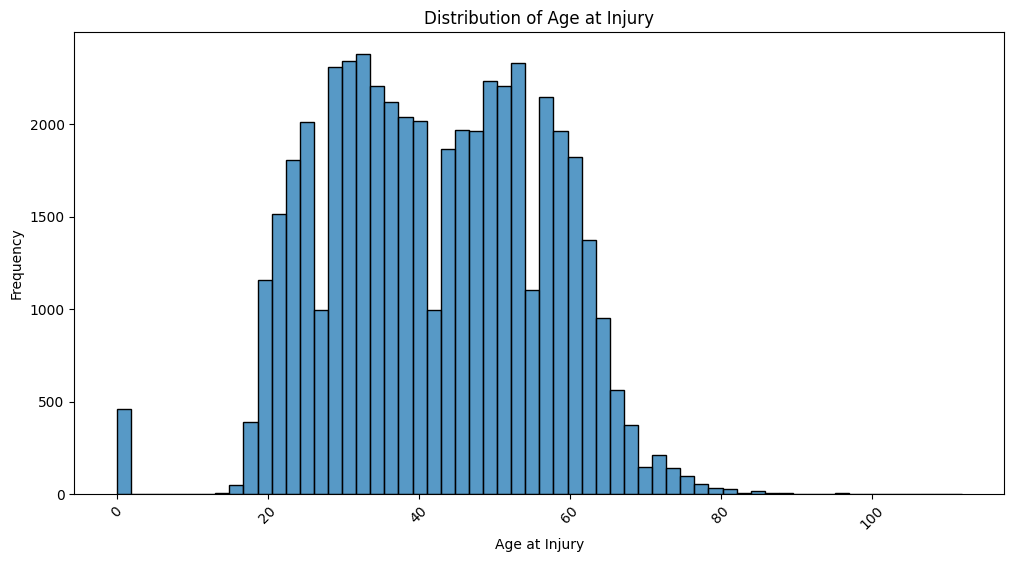

In [17]:
# distribution of average weekly wage

df_sample = df.sample(50000)
plt.figure(figsize=(12, 6))
sns.histplot(df_sample['Age at Injury'], bins=60)
plt.xticks(rotation=45)
plt.title('Distribution of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency')
plt.show()


In [18]:
C_o_In_indicators

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
1.0,CHEMICALS
2.0,HOT OBJECTS OR SUBSTANCES
3.0,TEMPERATURE EXTREMES
4.0,FIRE OR FLAME
5.0,STEAM OR HOT FLUIDS
...,...
96.0,TERRORISM
97.0,REPETITIVE MOTION
98.0,"CUMULATIVE, NOC"


* Now we can drop the columns with the descriptions and keep only the codes

* OIICS Nature of Injury Description does has zero values so we drop it too --> obtain information from website:

Create a visualization of the distribution of categorical variables 

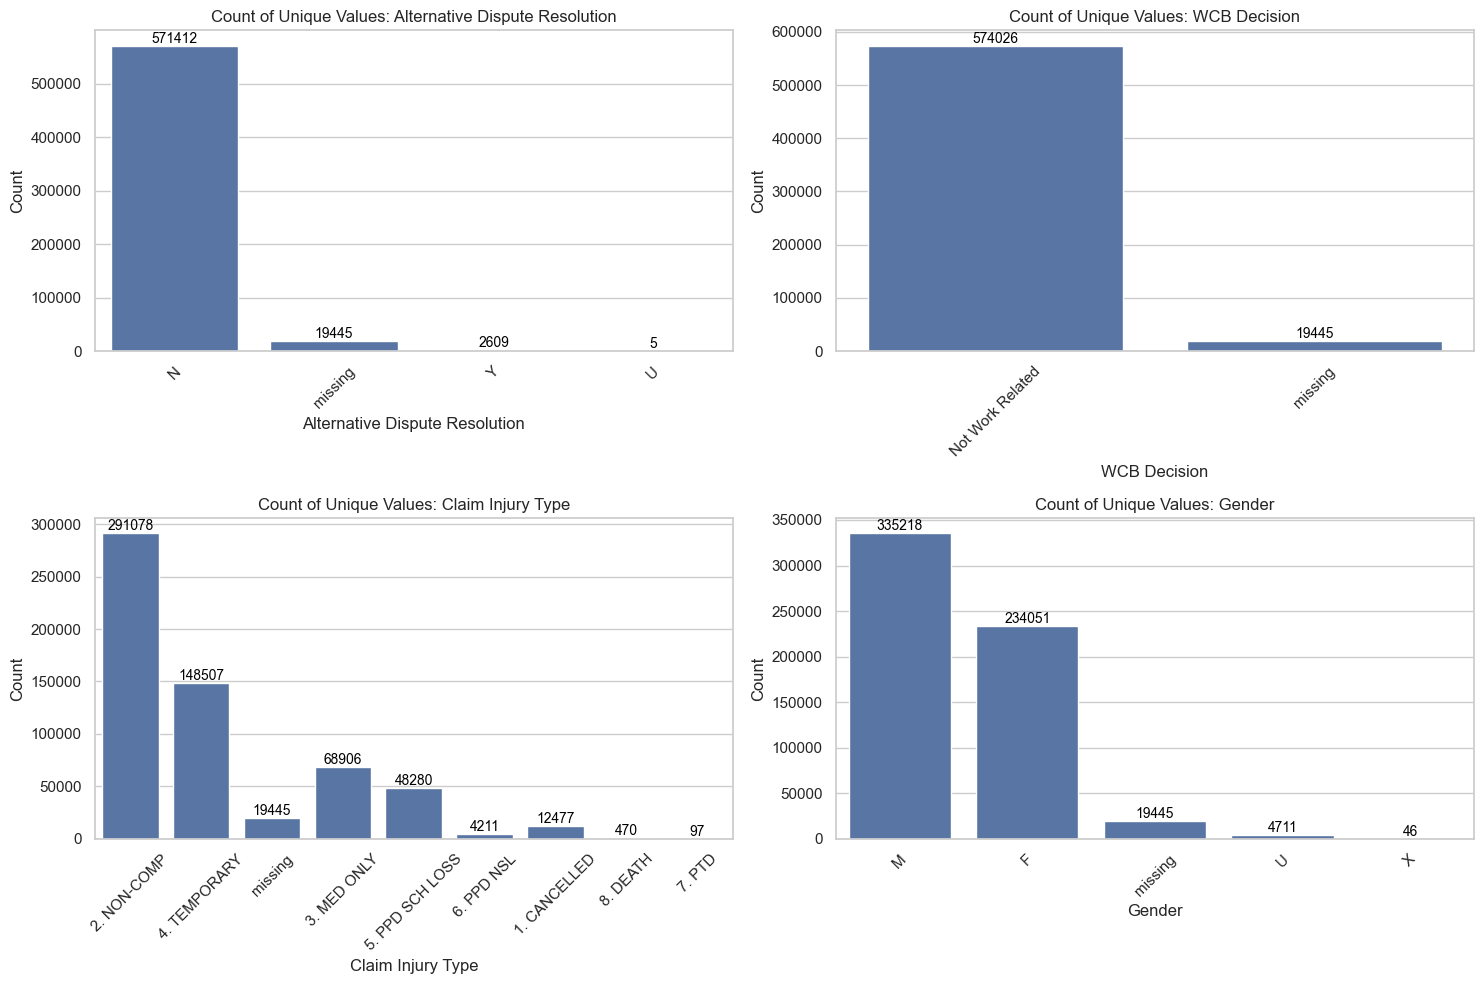

In [19]:
# Selecting the relevant columns for visualization
columns_to_plot = ['Alternative Dispute Resolution', 'WCB Decision', 'Claim Injury Type', 'Gender']


# Create a copy of the dataframe and fill the missing values to be able to plot the data
df_na = df.copy()
df_na = df_na[columns_to_plot].fillna("missing")

# Setting a Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")
# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Ensure axes is a flat array if it's a 2D array
axes = axes.flatten()


# Plotting bar plots for each column
for i, col in enumerate(columns_to_plot):

    sns.countplot(x= df_na[col], ax=axes[i], legend=False)
    axes[i].set_title(f"Count of Unique Values: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    # rotate the x-axis labels to 45 degress
    axes[i].tick_params(axis='x', rotation=45)
    # write the count of each bar on top of the bar and set the y-coordinate just above the bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', 
                     va='bottom', 
                     color='black', 
                     size=10)
    
    plt.title(f"Count of Unique Values: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# delete the copy again
del df_na


Drop Description columns

In [20]:
# check if we already dropped the columns
if [col for col in df.columns if 'Description' in col]:
    descr_col = [col for col in df.columns if 'Description' in col]


print("columns with description that we are going to drop: \n", descr_col)

# drop the columns with description | if statement to check if the columns are in the df or if we already dropped them
if any(col in df.columns for col in descr_col):
    df.drop(descr_col, axis=1, inplace = True)
    print("columns dropped successfully")
else:
    print("columns are already dropped")

columns with description that we are going to drop: 
 ['Industry Code Description', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']
columns dropped successfully


Age of individuals

* If Age at Injury is missing then Birth Year is missing 
* We can drop Birth Year --> Reduntant to have the information two times

In [21]:
# Age at Injury 
# Birth Year 
print('missing values of Age at Injury: ', df['Age at Injury'].isna().sum(), '\n', 'misisng values of Birth Year that ')
df[df['Age at Injury'].isna()]['Birth Year'].isna().sum()

# drop Birth Year column 
df.drop(columns= 'Birth Year', inplace = True)

missing values of Age at Injury:  19445 
 misisng values of Birth Year that 


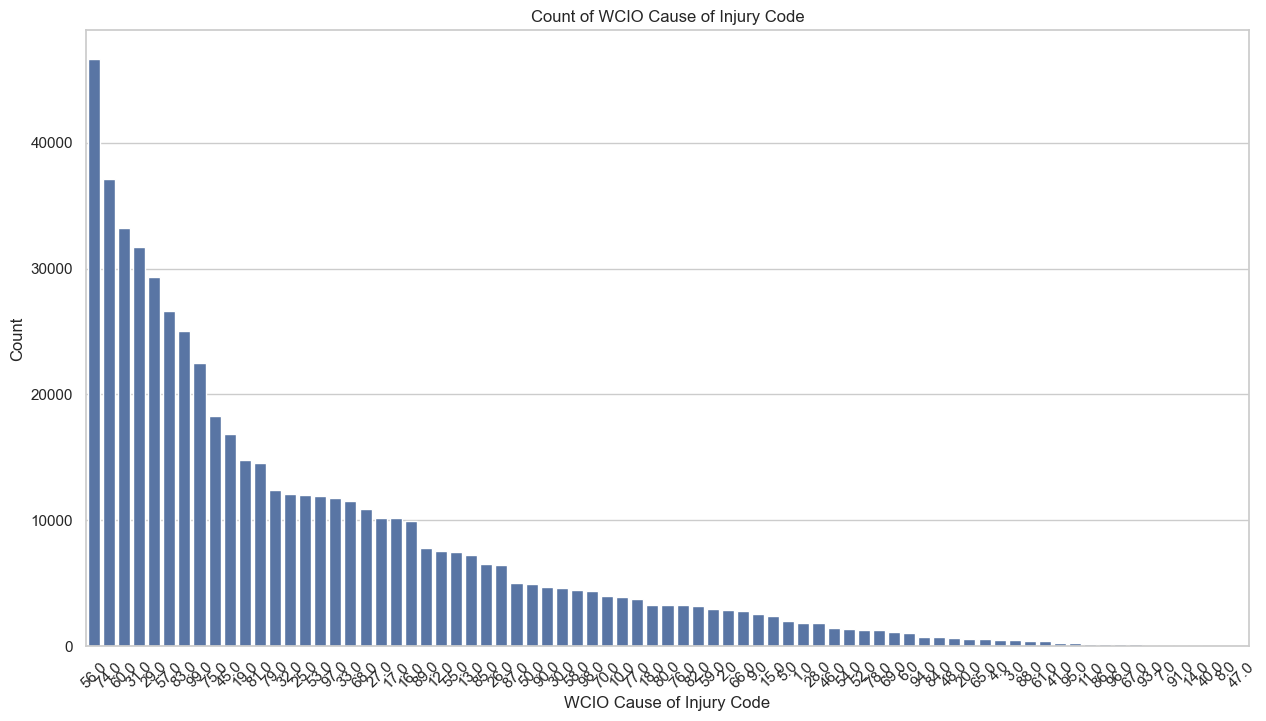

In [22]:
# create a barplot for the WCIO Cause of Injury Code and sort it by the count of the values
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='WCIO Cause of Injury Code', order=df['WCIO Cause of Injury Code'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of WCIO Cause of Injury Code')
plt.xlabel('WCIO Cause of Injury Code')
plt.ylabel('Count')
plt.show()


In [23]:
# create a barplot for the WCIO Cause of Injury Code
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.countplot(y='Industry Code Description', data=df, order = df['Industry Code Description'].value_counts().index)
# rotate the x-axis labels to 45 degress

plt.xticks(rotation=45)
plt.title('Count of Industry Code Description')
plt.xlabel('Count')
plt.ylabel('Industry Code Description')
plt.show()

KeyError: 'Industry Code Description'

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# For every industry code description we want to know the most common WCIO Cause of Injury Description
# Group by Industry Code Description and WCIO Cause of Injury Description and count the number of occurences


df_grouped = df.groupby(['Industry Code Description', 'WCIO Cause of Injury Description']).size().reset_index(name='Count')
# # Sort the values by Industry Code Description and Count
df_grouped = df_grouped.sort_values(by=['Industry Code Description', 'Count'], ascending=False)
# Get the first row for each Industry Code Description
df_grouped = df_grouped.groupby('Industry Code Description').first().reset_index()
# Sort the values by Count
df_grouped = df_grouped.sort_values(by='Count', ascending=False)
df_grouped


,Industry Code Description,WCIO Cause of Injury Description,Count
7,HEALTH CARE AND SOCIAL ASSISTANCE,"FELLOW WORKER, PATIENT OR OTHER PERSON",20275
17,TRANSPORTATION AND WAREHOUSING,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,9428
14,PUBLIC ADMINISTRATION,PUSHING OR PULLING,9248
16,RETAIL TRADE,LIFTING,7974
5,EDUCATIONAL SERVICES,"FELLOW WORKER, PATIENT OR OTHER PERSON",7206
10,MANUFACTURING,LIFTING,3934
4,CONSTRUCTION,FROM LADDER OR SCAFFOLDING,2374
19,WHOLESALE TRADE,LIFTING,2067
0,ACCOMMODATION AND FOOD SERVICES,ON SAME LEVEL,1899
1,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,LIFTING,1648


In [ ]:


# create a pivot table and count for ecery industry the WCIO Cause of Injury Description 



pivot = df.pivot_table(index='Industry Code Description', columns='WCIO Cause of Injury Description', values='Claim Identifier', aggfunc='count')
pivot



WCIO Cause of Injury Description,ABNORMAL AIR PRESSURE,"ABSORPTION, INGESTION OR INHALATION, NOC",ANIMAL OR INSECT,BROKEN GLASS,"CAUGHT IN, UNDER OR BETWEEN, NOC",CHEMICALS,COLD OBJECTS OR SUBSTANCES,COLLAPSING MATERIALS (SLIDES OF EARTH),COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,COLLISION WITH A FIXED OBJECT,...,"STRAIN OR INJURY BY, NOC","STRIKING AGAINST OR STEPPING ON, NOC","STRUCK OR INJURED, NOC",TEMPERATURE EXTREMES,TERRORISM,TWISTING,USING TOOL OR MACHINERY,VEHICLE UPSET,WELDING OPERATION,WIELDING OR THROWING
Industry Code Description,,,,,,,,,,,,,,,,,,,,,
ACCOMMODATION AND FOOD SERVICES,NaN,188.0,147.0,756.0,291.0,170.0,19.0,18.0,219.0,50.0,...,1049.0,183.0,540.0,41.0,2.0,429.0,54.0,17.0,1.0,17.0
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT,2.0,121.0,230.0,105.0,324.0,133.0,5.0,53.0,520.0,110.0,...,1020.0,109.0,516.0,19.0,4.0,459.0,95.0,38.0,2.0,26.0
"AGRICULTURE, FORESTRY, FISHING AND HUNTING",1.0,9.0,242.0,6.0,40.0,19.0,3.0,6.0,16.0,15.0,...,51.0,13.0,51.0,NaN,1.0,63.0,22.0,32.0,2.0,4.0
"ARTS, ENTERTAINMENT, AND RECREATION",NaN,29.0,274.0,47.0,67.0,30.0,7.0,13.0,32.0,41.0,...,992.0,56.0,199.0,12.0,3.0,416.0,39.0,12.0,NaN,54.0
CONSTRUCTION,4.0,104.0,112.0,98.0,411.0,89.0,14.0,126.0,491.0,79.0,...,1599.0,159.0,498.0,21.0,8.0,738.0,330.0,41.0,16.0,10.0
EDUCATIONAL SERVICES,3.0,244.0,323.0,79.0,472.0,151.0,12.0,33.0,224.0,99.0,...,1807.0,247.0,1756.0,16.0,1.0,941.0,136.0,21.0,4.0,31.0
FINANCE AND INSURANCE,1.0,57.0,78.0,23.0,158.0,23.0,NaN,4.0,177.0,14.0,...,320.0,51.0,116.0,6.0,1.0,220.0,35.0,2.0,NaN,10.0
HEALTH CARE AND SOCIAL ASSISTANCE,3.0,664.0,521.0,168.0,1200.0,251.0,46.0,52.0,1331.0,172.0,...,6636.0,524.0,2503.0,24.0,4.0,1870.0,177.0,45.0,2.0,33.0
INFORMATION,NaN,57.0,111.0,20.0,72.0,12.0,1.0,4.0,233.0,14.0,...,965.0,38.0,107.0,5.0,NaN,379.0,225.0,9.0,1.0,7.0


In [ ]:
# check if Age at injury is really a float 
print('unique values Age at Injury: , \n', df['Age at Injury'].unique(), '\n')

# use Birth Year to calculate the age at injury
df['Age at Injury'] = df['Injury Date'].str.split('/').str[-1].astype(int) - df['Birth Year']

unique values Age at Injury: , 
 [ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.] 



IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<a id='univariate-analysis'></a>
### 3.4 Univariate Analysis

- Visualize the distribution of individual features using histograms, box plots, etc.
- Interpret the visualizations and note any observations.


In [ ]:
# Histograms and box plots for numerical features
# for col in numerical_columns:
#     sns.histplot(df[col])
#     plt.show()
#     sns.boxplot(x=df[col])
#     plt.show()

<a id='multivariate-analysis'></a>
### 3.5 Multivariate Analysis

- Analyze relationships between pairs of variables using scatter plots, heatmaps, etc.
- Investigate correlations and potential interactions between features.


In [ ]:
# Correlation matrix
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

# Pair plots
# sns.pairplot(df)
# plt.show()

<a id='data-cleaning-and-pre-processing'></a>
## Data Cleaning and Pre-processing


<a id='handling-missing-values'></a>
### 4.1 Handling Missing Values

- Identify features with missing values.
- Discuss different strategies to handle missing data (deletion, imputation, etc.).
- Justify the chosen method and apply it.


Create a visualization of the distribution of categorical variables 

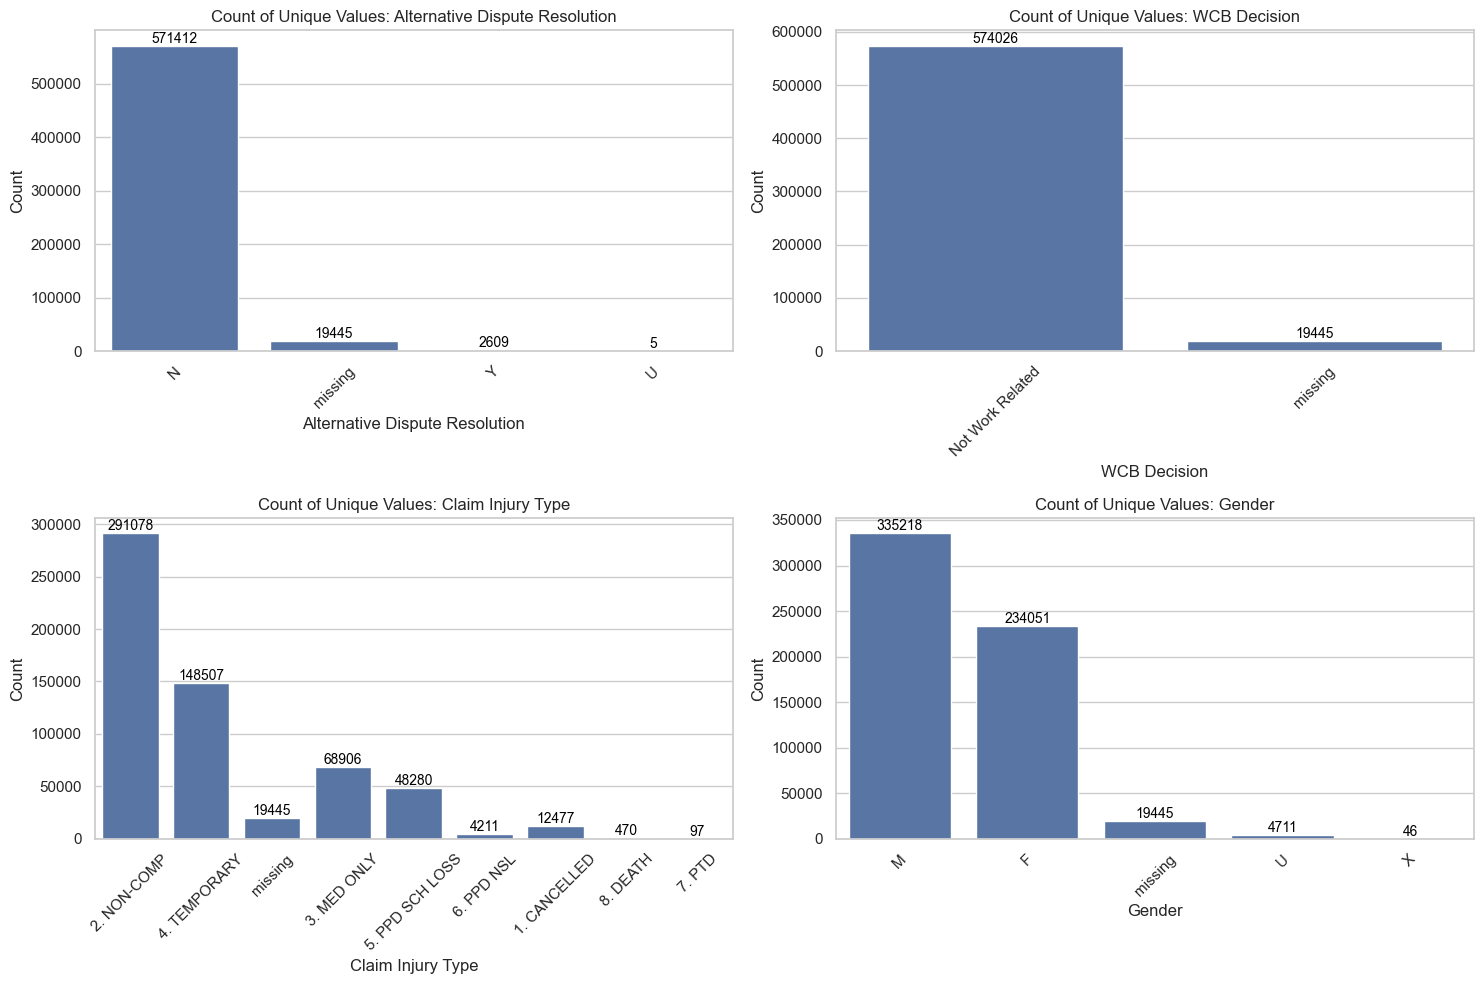

In [ ]:
# Selecting the relevant columns for visualization
columns_to_plot = ['Alternative Dispute Resolution', 'WCB Decision', 'Claim Injury Type', 'Gender']


# Create a copy of the dataframe and fill the missing values to be able to plot the data
df_na = df.copy()
df_na = df_na[columns_to_plot].fillna("missing")

# Setting a Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")
# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Ensure axes is a flat array if it's a 2D array
axes = axes.flatten()


# Plotting bar plots for each column
for i, col in enumerate(columns_to_plot):

    sns.countplot(x= df_na[col], ax=axes[i], legend=False)
    axes[i].set_title(f"Count of Unique Values: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    # rotate the x-axis labels to 45 degress
    axes[i].tick_params(axis='x', rotation=45)
    # write the count of each bar on top of the bar and set the y-coordinate just above the bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', 
                     va='bottom', 
                     color='black', 
                     size=10)
    
    plt.title(f"Count of Unique Values: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# delete the copy again
del df_na


In [ ]:
# from object to datetime for the following columns
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'])
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'])
df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'])

In [ ]:
# check for index duplicates
dubles = df["Claim Identifier"].value_counts()
dubles = dubles[dubles > 1]
dubles = dubles.index 
dubles


duplicates = df[df.duplicated(subset=['Claim Identifier'], keep="first")]
df = df.drop(duplicates.index)

Removing Rows with NaNs > 70%

In [ ]:
# set threshold to 70% of the columns
threshold = int(df.shape[1] * 0.7)
# Find rows with 70% or more NaN values
rows_with_70_percent_nans = df[df.isnull().sum(axis=1) >= threshold]
# Count the number of rows with 70% or more NaN values
num_rows = rows_with_70_percent_nans.shape[0]

# Print the number of rows with 70% or more NaN values
print(f'There are {num_rows} rows with 70% or more NaN values which we will drop.')
# Drop rows with 70% or more NaN values
df= df.dropna(thresh=df.shape[1] - threshold)

Drop reagional columns. Not ethical to to use it as a feature. We can use it for visualization later on

In [ ]:
# Don't drop county/zip & medical fee region
# columns to drop = ['County Of Injury', 'Zip', 'Medical Fee Region']

In [ ]:
# Identify missing values
# df.isnull().sum()

# Handle missing values
# Example: df.dropna() or df.fillna(method='ffill')

<a id='outlier-detection-and-treatment'></a>
### 4.2 Outlier Detection and Treatment

- Use statistical methods to detect outliers.
- Visualize outliers using box plots or scatter plots.
- Decide on an approach to handle outliers (removal, transformation, etc.).
- Justify your decisions.


In [ ]:
# Detect outliers
# for col in numerical_columns:
#     sns.boxplot(x=df[col])
#     plt.show()

# Handle outliers
# Example: Remove or cap outliers

<a id='dealing-with-categorical-variables'></a>
### 4.3 Dealing with Categorical Variables

- Identify categorical features in the dataset.
- Discuss encoding techniques (one-hot encoding, label encoding, etc.).
- Apply the chosen encoding method to transform categorical variables.


In [ ]:
# Identify categorical variables
# categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical variables
# df = pd.get_dummies(df, columns=categorical_columns)

<a id='feature-engineering'></a>
### 4.4 Feature Engineering


<a id='feature-creation'></a>
#### 4.4.1 Feature Creation

- Explore the possibility of creating new features from existing ones.
- Describe the rationale behind new feature creation.
- Implement the new features.


In [ ]:
# Create new features

# Convert date columns to datetime for calculations
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], errors='coerce')
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], errors='coerce')

# Feature 1: Claim Duration (in days) - Time between 'Accident Date' and 'Assembly Date'
df['Claim Duration'] = (df['Assembly Date'] - df['Accident Date']).dt.days

# Feature 2: Age at Accident Year
df['Accident Year'] = df['Accident Date'].dt.year
df['Age at Accident Year'] = df['Accident Year'] - df['Birth Year']

# Feature 3: Attorney Involvement (Binary transformation of 'Attorney/Representative')
df['Attorney Involved'] = df['Attorney/Representative'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature 4: Wage Categorization (Low, Medium, High)
df['Wage Category'] = pd.cut(df['Average Weekly Wage'], bins=[0, 500, 1000, float('inf')], labels=['Low', 'Medium', 'High'])

# Feature 5: Claim Filing Delay (in days) - Time between 'C-2 Date' and 'C-3 Date'
df['Claim Filing Delay'] = (df['C-3 Date'] - df['C-2 Date']).dt.days

# Display the new features
engineered_features = df[['Claim Duration', 'Age at Accident Year', 'Attorney Involved', 'Wage Category', 'Claim Filing Delay']].head()

import ace_tools as tools; tools.display_dataframe_to_user(name="Engineered Features", dataframe=engineered_features)

engineered_features


<a id='feature-transformation'></a>
#### 4.4.2 Feature Transformation

- Apply transformations to features if necessary (e.g., log transformation).
- Explain the reasoning for transforming features.


In [ ]:
# Transform features
# Example: df['transformed_feature'] = np.log(df['feature'])

<a id='data-scaling-and-normalization'></a>
### 4.5 Data Scaling and Normalization

- Discuss the importance of feature scaling.
- Choose appropriate scaling methods (StandardScaler, MinMaxScaler, etc.).
- Apply scaling to the dataset.
- Explain how scaling affects the model performance.


In [ ]:
# Scale features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

<a id='feature-selection'></a>
## Feature Selection


<a id='feature-importance-analysis'></a>
### 5.1 Feature Importance Analysis

- Use methods like feature importance from tree-based models to assess feature relevance.
- Present the results and interpret them.


In [ ]:
# Feature importance using Random Forest
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# feature_importances = model.feature_importances_

<a id='correlation-matrix'></a>
### 5.2 Correlation Matrix

- Create a correlation matrix to identify highly correlated features.
- Discuss potential issues with multicollinearity.


In [ ]:
# Correlation matrix
# corr_matrix = pd.DataFrame(df_scaled).corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

<a id='dimensionality-reduction-techniques'></a>
### 5.3 Dimensionality Reduction Techniques

- Consider techniques like PCA if applicable.
- Explain the benefits and drawbacks of dimensionality reduction.


In [ ]:
# Apply PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=number_of_components)
# df_pca = pca.fit_transform(df_scaled)

<a id='final-feature-selection'></a>
### 5.4 Final Feature Selection

- Define a clear strategy for selecting the final set of features.
- Justify the selection based on the analysis.
- Prepare the dataset with the selected features for modeling.


In [ ]:
# Select final features
# selected_features = ['feature1', 'feature2', 'feature3']
# X = df[selected_features]
# y = df['target']

<a id='model-building'></a>
## Model Building


<a id='problem-type-identification'></a>
### 6.1 Problem Type Identification

- Confirm that the task is a classification problem.
- Discuss the nature of the target variable (binary, multiclass).


<a id='algorithm-selection'></a>
### 6.2 Algorithm Selection

- List potential algorithms suitable for the problem (e.g., Logistic Regression, Decision Trees).
- Justify the choice of algorithms to be used.


In [ ]:
# List of algorithms
# algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

<a id='model-training'></a>
### 6.3 Model Training

- Split the dataset into training and validation sets.
- Train the selected models using the training data.
- Provide details on model parameters and settings.


In [ ]:
# Split the dataset
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
# Example with Logistic Regression:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(X_train, y_train)

<a id='cross-validation'></a>
### 6.4 Cross-Validation

- Explain the purpose of cross-validation.
- Implement cross-validation techniques (e.g., k-fold CV).
- Record cross-validation results.


In [ ]:
# Cross-validation
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(model, X_train, y_train, cv=5)
# print(cv_scores)

<a id='performance-metrics'></a>
### 6.5 Performance Metrics

- Choose appropriate evaluation metrics (accuracy, precision, recall, F1-score, ROC-AUC).
- Justify the choice of metrics based on the problem context.


In [ ]:
# Evaluate model
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# y_pred = model.predict(X_val)
# print('Accuracy:', accuracy_score(y_val, y_pred))
# print('Precision:', precision_score(y_val, y_pred))
# print('Recall:', recall_score(y_val, y_pred))
# print('F1 Score:', f1_score(y_val, y_pred))

<a id='model-evaluation'></a>
### 6.6 Model Evaluation

- Evaluate the model performance using the selected metrics.
- Compare results between different models.
- Discuss any observations or insights.


<a id='prediction-on-test-set'></a>
## Prediction on Test Set


<a id='generating-predictions'></a>
### 7.1 Generating Predictions

- Use the trained model to make predictions on the test dataset.
- Explain any pre-processing steps needed for the test data.


In [ ]:
# Predict on test set
# test_data = pd.read_csv('test_dataset.csv')
# Apply same pre-processing steps to test_data
# predictions = model.predict(test_data)

<a id='result-interpretation'></a>
### 7.2 Result Interpretation

- Interpret the prediction results.
- Discuss potential implications or actions based on the predictions.


<a id='conclusion'></a>
## Conclusion

- Summarize the key findings from the analysis.
- Reflect on the model's performance and potential improvements.
- Suggest next steps or recommendations.


<a id='references'></a>
## References

- List any resources, articles, or papers referenced during the analysis.


<a id='appendices'></a>
## Appendices

- Include any additional tables, figures, or code snippets that support the analysis.
